In [71]:

import yfinance as yf
import pandas as pd

# List of 50 company ticker symbols (can be modified as per your need)
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'BRK-B', 'JPM', 'JNJ',
    'V', 'UNH', 'HD', 'PG', 'MA', 'DIS', 'BAC', 'XOM', 'VZ', 'ADBE',
    'PFE', 'KO', 'PEP', 'T', 'MRK', 'ABBV', 'CVX', 'INTC', 'CSCO', 'WMT',
    'NFLX', 'NKE', 'CRM', 'ORCL', 'ACN', 'ABT', 'TMO', 'MCD', 'UPS', 'COST',
    'QCOM', 'LLY', 'MDT', 'DHR', 'AMGN', 'TXN', 'HON', 'NEE', 'PM', 'BMY'
]

# Download historical data (default: past 1 year)
data = yf.download(tickers, start="2011-01-01", end="2024-01-01", group_by='ticker')


close_prices = pd.concat([data[ticker]['Close'] for ticker in tickers], axis=1)
close_prices.columns = tickers

# Calculate daily returns
returns = close_prices.pct_change().dropna()

# Display the first few rows
print(returns.head())


[*********************100%***********************]  50 of 50 completed

                AAPL      MSFT     GOOGL      AMZN      META      TSLA  \
Date                                                                     
2013-01-03 -0.012622 -0.013396  0.000581  0.004547 -0.008214 -0.016685   
2013-01-04 -0.027855 -0.018716  0.019761  0.002592  0.035650 -0.010642   
2013-01-07 -0.005882 -0.001870 -0.004363  0.035925  0.022948 -0.001744   
2013-01-08  0.002691 -0.005245 -0.001973 -0.007748 -0.012237 -0.019220   
2013-01-09 -0.015629  0.005650  0.006573 -0.000113  0.052650 -0.001187   

                NVDA     BRK-B       JPM       JNJ  ...      QCOM       LLY  \
Date                                                ...                       
2013-01-03  0.000786  0.004507 -0.002015 -0.001411  ... -0.004633  0.004242   
2013-01-04  0.032993  0.002457  0.017725  0.011450  ... -0.014740  0.037007   
2013-01-07 -0.028897 -0.004262  0.001103 -0.002096  ...  0.008032 -0.001358   
2013-01-08 -0.021927  0.003852  0.001982  0.000140  ... -0.001562  0.007575   
2013-01

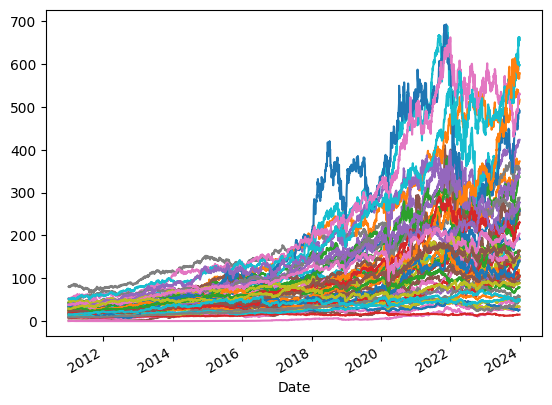

In [35]:
import matplotlib.pyplot as plt 

for i in tickers: 
    data[i]['Close'].plot()

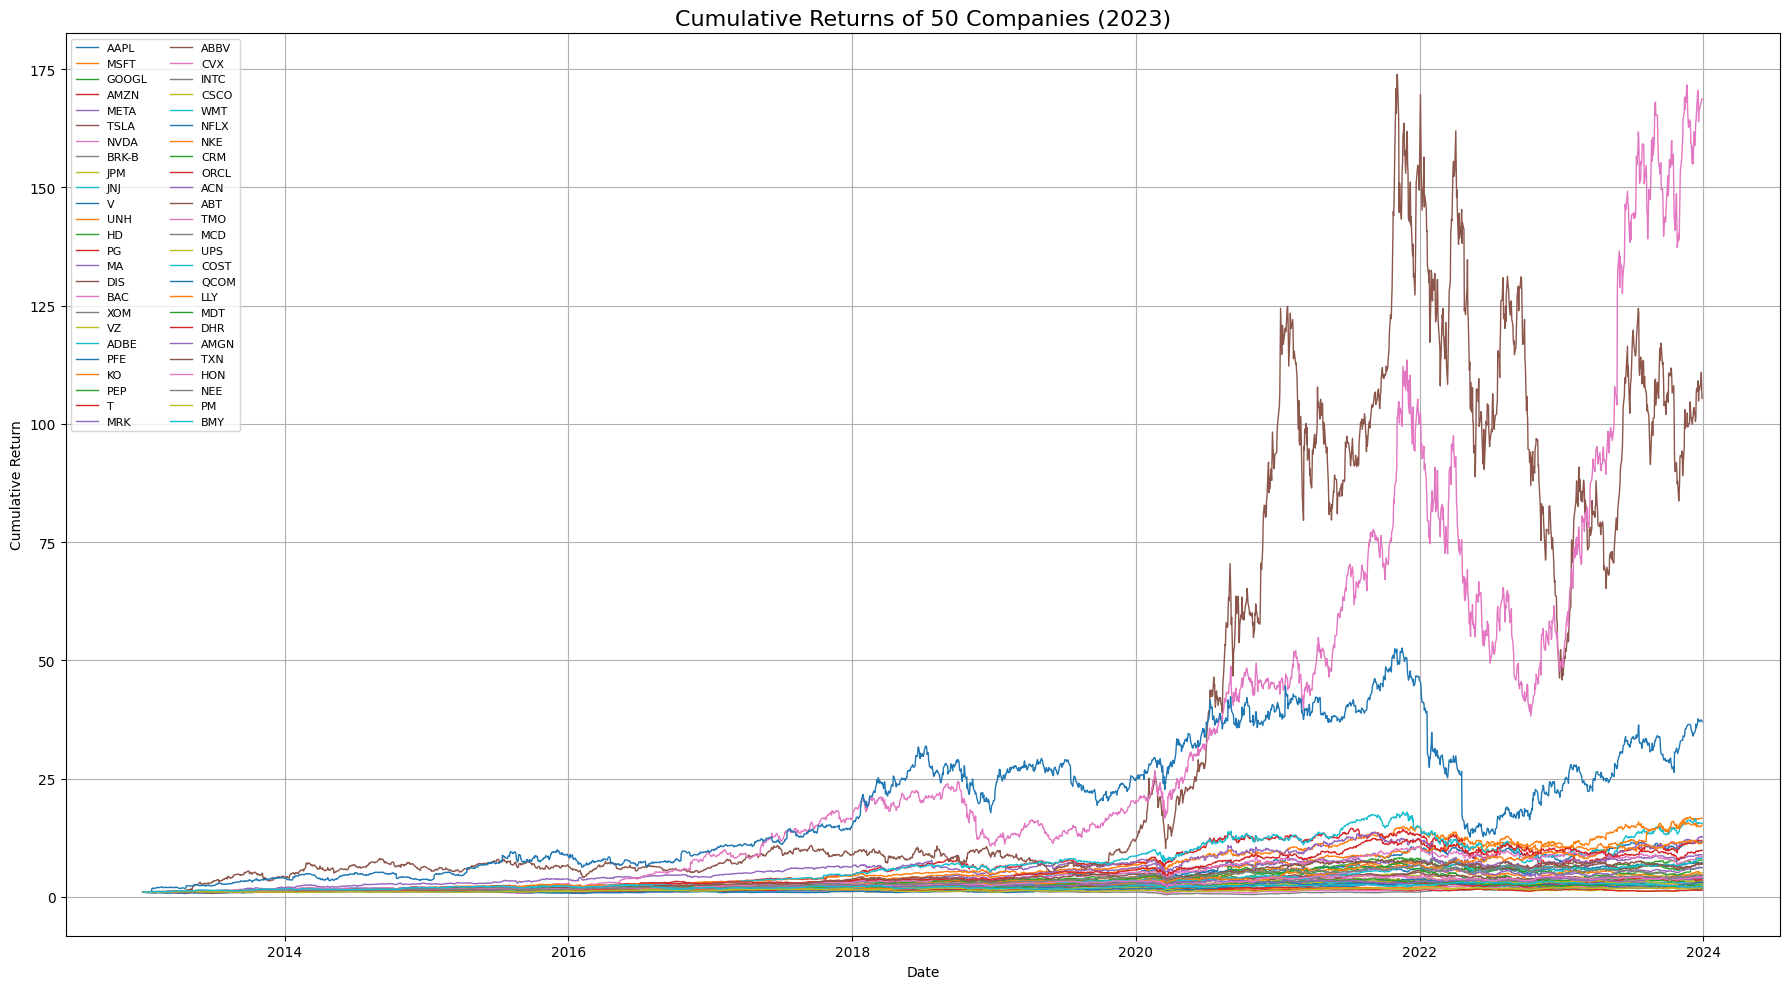

                 AAPL       MSFT     GOOGL       AMZN       META        TSLA  \
Date                                                                           
2013-01-03   0.987378   0.986604  1.000581   1.004547   0.991786    0.983315   
2013-01-04   0.959875   0.968139  1.020353   1.007151   1.027143    0.972851   
2013-01-07   0.954228   0.966329  1.015900   1.043333   1.050714    0.971154   
2013-01-08   0.956797   0.961260  1.013896   1.035249   1.037857    0.952489   
2013-01-09   0.941843   0.966691  1.020560   1.035133   1.092500    0.951358   
...               ...        ...       ...        ...        ...         ...   
2023-12-22  11.545050  16.593044  7.817408  11.924915  12.621071  107.129540   
2023-12-26  11.512250  16.596591  7.819067  11.924138  12.672498  108.856064   
2023-12-27  11.518213  16.570454  7.755527  11.918697  12.779642  110.904997   
2023-12-28  11.543856  16.624054  7.747793  11.921806  12.797142  107.401033   
2023-12-29  11.481241  16.657722  7.7179

In [36]:
close = pd.DataFrame({ticker: data[ticker]['Close'] for ticker in tickers})
returns = close.pct_change().dropna()
cumulative_returns = (1 + returns).cumprod()
plt.figure(figsize=(18, 10))
for ticker in tickers:
    plt.plot(cumulative_returns[ticker], label=ticker, linewidth=1)

plt.title('Cumulative Returns of 50 Companies (2023)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left', ncol=2, fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()
print(cumulative_returns)

50


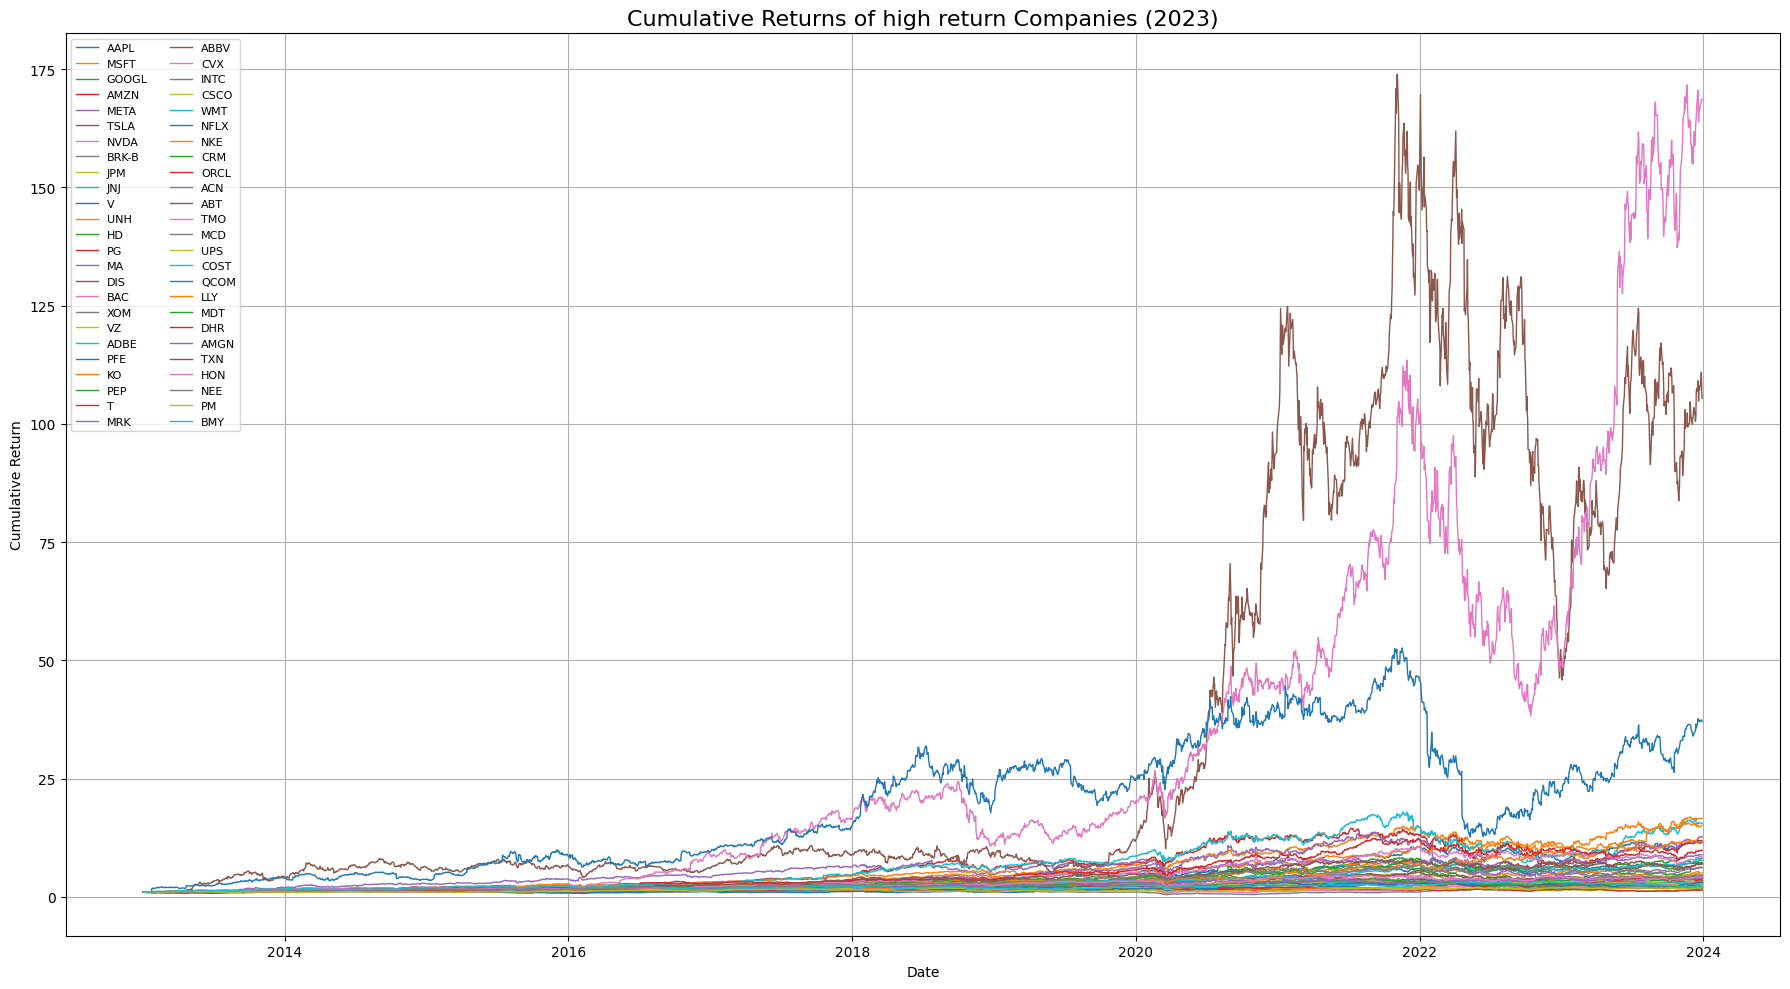

                 AAPL       MSFT     GOOGL       AMZN       META        TSLA  \
Date                                                                           
2013-01-03   0.987378   0.986604  1.000581   1.004547   0.991786    0.983315   
2013-01-04   0.959875   0.968139  1.020353   1.007151   1.027143    0.972851   
2013-01-07   0.954228   0.966329  1.015900   1.043333   1.050714    0.971154   
2013-01-08   0.956797   0.961260  1.013896   1.035249   1.037857    0.952489   
2013-01-09   0.941843   0.966691  1.020560   1.035133   1.092500    0.951358   
...               ...        ...       ...        ...        ...         ...   
2023-12-22  11.545050  16.593044  7.817408  11.924915  12.621071  107.129540   
2023-12-26  11.512250  16.596591  7.819067  11.924138  12.672498  108.856064   
2023-12-27  11.518213  16.570454  7.755527  11.918697  12.779642  110.904997   
2023-12-28  11.543856  16.624054  7.747793  11.921806  12.797142  107.401033   
2023-12-29  11.481241  16.657722  7.7179

In [37]:

returns = close.pct_change().dropna()
cumulative_returns = (1 + returns).cumprod()
remaining_companies = close.columns.tolist()

plt.figure(figsize=(18, 10))
for ticker in remaining_companies:
    plt.plot(cumulative_returns[ticker], label=ticker, linewidth=1)
print(len(remaining_companies))

plt.title('Cumulative Returns of high return Companies (2023)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left', ncol=2, fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()
print(cumulative_returns)

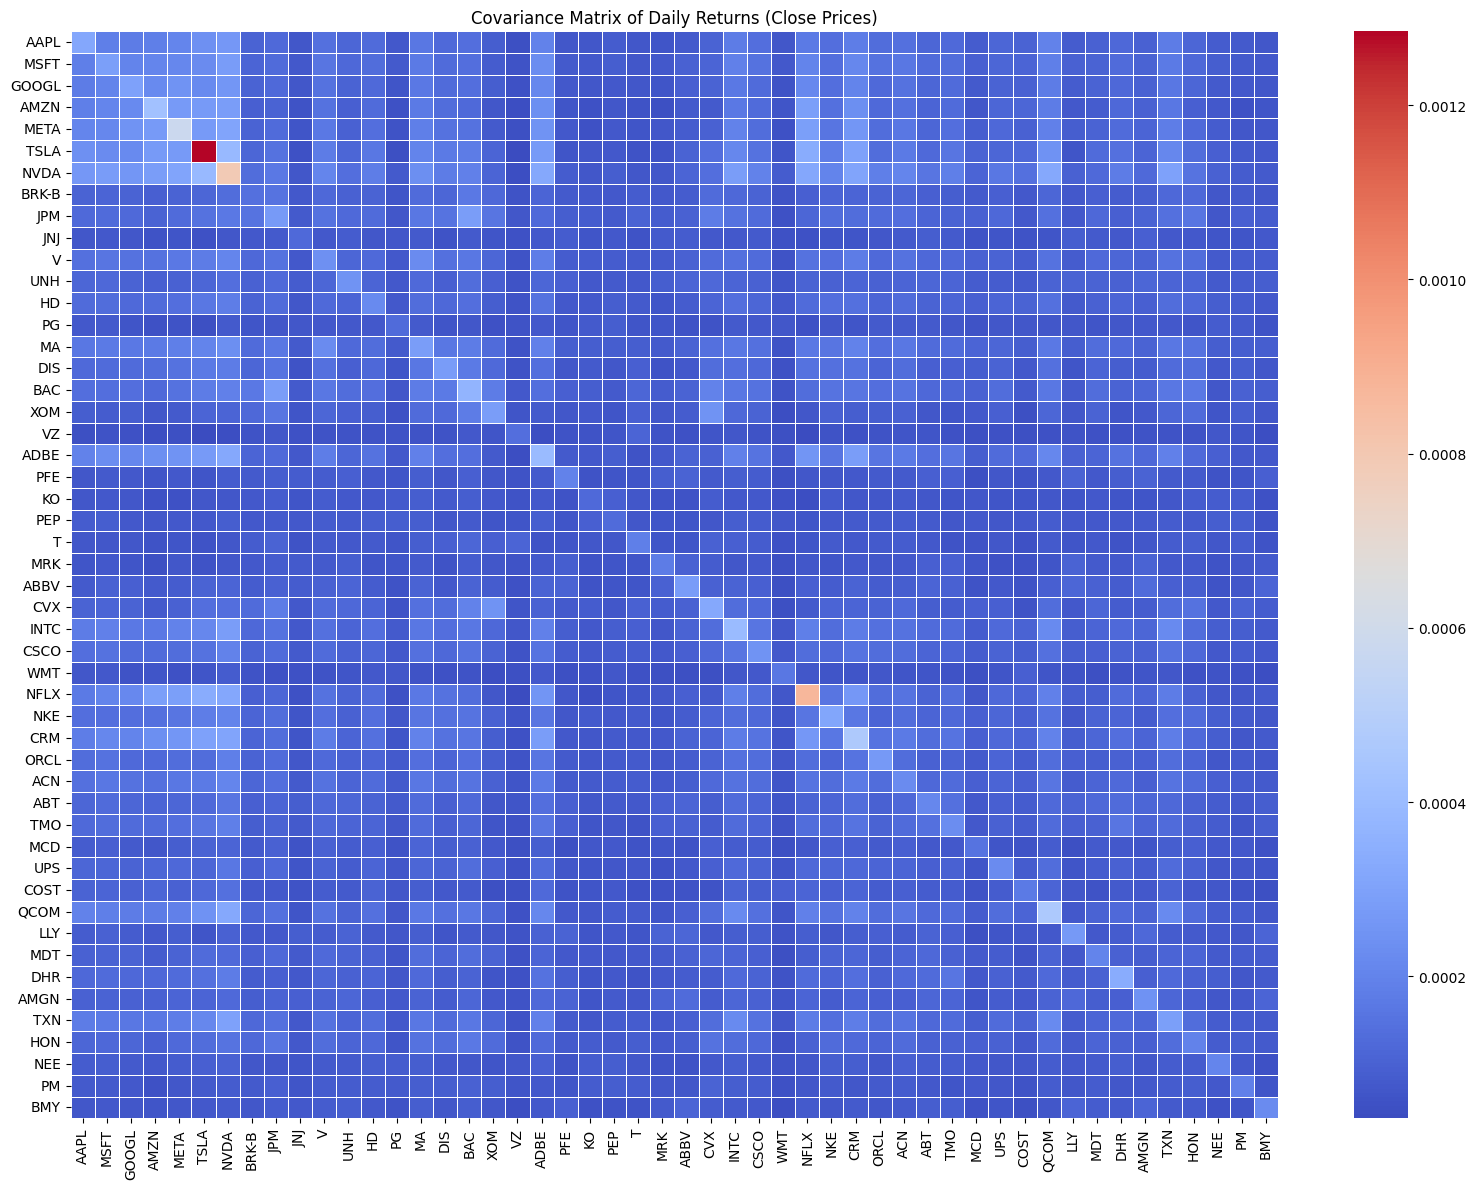

In [38]:
import seaborn as sns
cov_matrix = returns.cov() 
plt.figure(figsize = (16,12))
sns.heatmap(cov_matrix,annot = False,cmap = "coolwarm",linewidth = 0.5)
plt.title("Covariance Matrix of Daily Returns (Close Prices)")
plt.tight_layout() 
plt.show()

## Reinforcement model 

In [39]:
## PRE-PROCESSING THE DATA 

import numpy as np
import pandas as pd

# Daily returns
returns = close.pct_change().dropna()

# Normalize prices for comparability
normalized_prices = close / close.iloc[0]


In [43]:
import numpy as np
import gym
from gym import spaces

class PortfolioEnv(gym.Env):
    def __init__(self, returns, window=10):
        super(PortfolioEnv, self).__init__()
        self.returns = returns.values
        self.window = window
        self.n_assets = returns.shape[1]
        self.max_steps = len(returns) - window - 1

        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(window, self.n_assets), dtype=np.float32
        )

        self.seed()  # initialize seed
        self.reset()

    def seed(self, seed=None):
        self.np_random, seed = gym.utils.seeding.np_random(seed)
        return [seed]

    def reset(self):
        self.current_step = 0
        self.weights = np.ones(self.n_assets) / self.n_assets
        return self._get_observation()

    def _get_observation(self):
        return self.returns[self.current_step:self.current_step + self.window]

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / np.sum(action)
        past_returns = self.returns[self.current_step + self.window]
        reward = np.dot(action, past_returns)
        self.current_step += 1
        done = self.current_step >= self.max_steps
        return self._get_observation(), reward, done, {}

    def render(self, mode='human'):
        pass


In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

# Create vectorized environment
env = PortfolioEnv(returns)
vec_env = make_vec_env(lambda: env, n_envs=1)

# Train agent
model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=100000)


In [ ]:
# 1/N Strategy
equal_weights = np.ones(returns.shape[1]) / returns.shape[1]
equal_cum_returns = (1 + returns @ equal_weights).cumprod()

# Mean-Variance Portfolio
window = 60  # Lookback window (e.g., 60 days)
mv_returns = []

for t in range(window, len(returns)):
    past_returns = returns.iloc[t - window:t]
    
    mean_returns = past_returns.mean()
    cov_matrix = past_returns.cov()

    # Mean-variance optimization (no regularization for simplicity)
    inv_cov = np.linalg.pinv(cov_matrix)  # Use pinv for numerical stability
    weights = inv_cov @ mean_returns
    weights /= np.sum(weights)

    # Apply weights to the *next day's return* (not current, not past)
    ret = np.dot(returns.iloc[t], weights)
    mv_returns.append(ret)

# Convert to cumulative returns
mv_cum_returns = pd.Series(mv_returns, index=returns.index[window:])
mv_cum_returns = (1 + mv_cum_returns).cumprod()

# RL Agent Evaluation
state = env.reset()
rl_returns = []

for _ in range(env.max_steps):
    action, _ = model.predict(state)
    state, reward, done, _ = env.step(action)
    rl_returns.append(reward)
    if done:
        break

rl_cum_returns = pd.Series(rl_returns).add(1).cumprod()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(equal_cum_returns.values, label="Equal Weight (1/N)")
#plt.plot(mv_cum_returns.values[0:2000], label="Mean-Variance")
plt.plot(rl_cum_returns.values, label="RL Agent")
plt.legend()
plt.title("Portfolio Cumulative Returns Comparison")
plt.xlabel("Days")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.tight_layout()
plt.show()


Total number of zero weights: 69589
Zero weights per asset:
Asset 0: 1189 times
Asset 1: 991 times
Asset 2: 1753 times
Asset 3: 1172 times
Asset 4: 1080 times
Asset 5: 1882 times
Asset 6: 767 times
Asset 7: 1002 times
Asset 8: 1330 times
Asset 9: 1495 times
Asset 10: 1437 times
Asset 11: 1921 times
Asset 12: 1476 times
Asset 13: 1866 times
Asset 14: 1880 times
Asset 15: 1921 times
Asset 16: 1192 times
Asset 17: 1561 times
Asset 18: 744 times
Asset 19: 1323 times
Asset 20: 1008 times
Asset 21: 1122 times
Asset 22: 1839 times
Asset 23: 1508 times
Asset 24: 1560 times
Asset 25: 598 times
Asset 26: 1928 times
Asset 27: 1512 times
Asset 28: 1075 times
Asset 29: 2003 times
Asset 30: 1029 times
Asset 31: 1215 times
Asset 32: 967 times
Asset 33: 1534 times
Asset 34: 1893 times
Asset 35: 1799 times
Asset 36: 850 times
Asset 37: 675 times
Asset 38: 1325 times
Asset 39: 462 times
Asset 40: 1533 times
Asset 41: 1029 times
Asset 42: 1927 times
Asset 43: 1604 times
Asset 44: 770 times
Asset 45: 2073

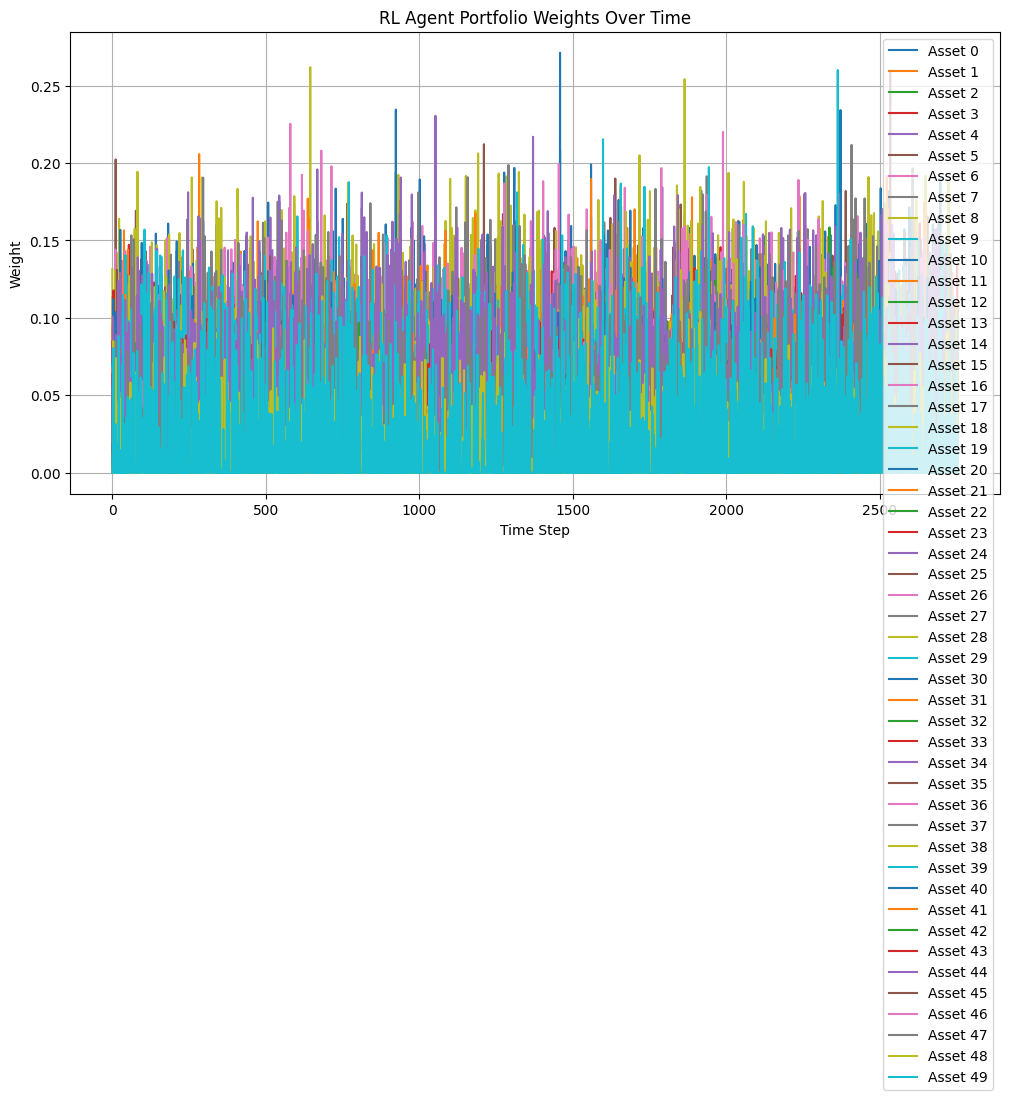

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO

# Assuming you've already trained the model:
# model = PPO("MlpPolicy", vec_env, verbose=1)
# model.learn(total_timesteps=10000)

# Initialize environment again for evaluation
env = PortfolioEnv(returns)
obs = env.reset()

# Store RL agent weights over time
rl_weights = []

done = False
while not done:
    action, _ = model.predict(obs, deterministic=True)
    action = np.clip(action, 0, 1)
    action /= np.sum(action)
    rl_weights.append(action)
    obs, reward, done, info = env.step(action)

# Convert list to NumPy array for analysis
rl_weights = np.array(rl_weights)  # shape: (timesteps, n_assets)

# Count total zeros across all weights
total_zeros = np.count_nonzero(rl_weights == 0)
print(f"Total number of zero weights: {total_zeros}")

# Count zeros per asset (column-wise)
zeros_per_asset = (rl_weights == 0).sum(axis=0)
print("Zero weights per asset:")
for i, count in enumerate(zeros_per_asset):
    print(f"Asset {i}: {count} times")

# Optional: Plotting weights to visualize sparsity
plt.figure(figsize=(12, 6))
for i in range(rl_weights.shape[1]):
    plt.plot(rl_weights[:, i], label=f"Asset {i}")
plt.title("RL Agent Portfolio Weights Over Time")
plt.xlabel("Time Step")
plt.ylabel("Weight")
plt.legend()
plt.grid(True)
plt.show()


## MAKING THE MODEL BETTER 

[*********************100%***********************]  50 of 50 completed


Epoch 1: Total reward = 595.5689
Epoch 2: Total reward = 596.2203
Epoch 3: Total reward = 600.2375
Epoch 4: Total reward = 603.2151
Epoch 5: Total reward = 604.3093
Epoch 6: Total reward = 601.9413
Epoch 7: Total reward = 598.8345
Epoch 8: Total reward = 596.3666
Epoch 9: Total reward = 596.6810
Epoch 10: Total reward = 596.5950
Epoch 11: Total reward = 596.2236
Epoch 12: Total reward = 597.8350
Epoch 13: Total reward = 598.0803
Epoch 14: Total reward = 600.1280
Epoch 15: Total reward = 600.2452
Epoch 16: Total reward = 599.8488
Epoch 17: Total reward = 597.6842
Epoch 18: Total reward = 598.2770
Epoch 19: Total reward = 598.1602
Epoch 20: Total reward = 597.4447
Epoch 21: Total reward = 596.5297
Epoch 22: Total reward = 594.8124
Epoch 23: Total reward = 595.2943
Epoch 24: Total reward = 592.5345
Epoch 25: Total reward = 591.6932
Epoch 26: Total reward = 590.7904
Epoch 27: Total reward = 591.1674
Epoch 28: Total reward = 590.6179
Epoch 29: Total reward = 589.5281
Epoch 30: Total reward 

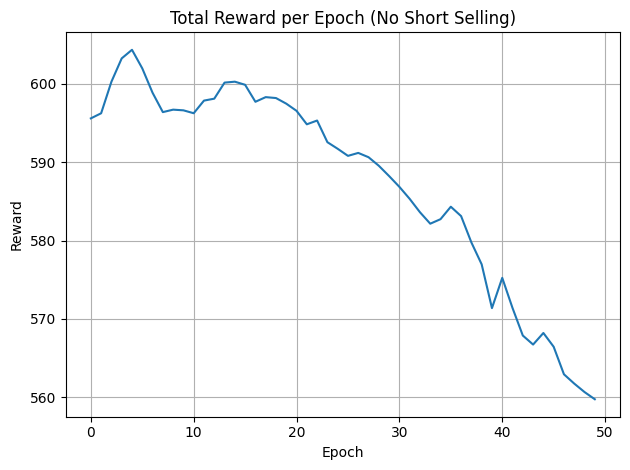

In [92]:
import numpy as np
import pandas as pd
import gym
from gym import spaces
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# ========== ENVIRONMENT ==========
class PortfolioEnv(gym.Env):
    def __init__(self, prices, window=10, transaction_fee=0.002, sortino_window=30):
        super(PortfolioEnv, self).__init__()
        self.prices = prices.values
        self.window = window
        self.n_assets = prices.shape[1]
        self.max_steps = len(prices) - window - 1
        self.transaction_fee = transaction_fee
        self.sortino_window = sortino_window
        self.returns_history = []

        # No short selling: weights must be >= 0 and sum to 1
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(window, self.n_assets), dtype=np.float32)

        self.seed()
        self.reset()

    def seed(self, seed=None):
        self.np_random, seed = gym.utils.seeding.np_random(seed)
        return [seed]

    def reset(self):
        self.current_step = 0
        self.weights = np.ones(self.n_assets) / self.n_assets
        self.returns_history = []
        return self._get_observation()

    def _get_observation(self):
        return self.prices[self.current_step:self.current_step + self.window]

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / (np.sum(action) + 1e-8)  # Normalize to sum to 1
        prev_weights = self.weights
        self.weights = action

        current_prices = self.prices[self.current_step + self.window - 1]
        next_prices = self.prices[self.current_step + self.window]

        log_returns = np.log(next_prices / (current_prices + 1e-8))
        portfolio_return = np.dot(action, log_returns)
        transaction_cost = self.transaction_fee * np.sum(np.abs(action - prev_weights))
        net_return = portfolio_return - transaction_cost

        self.returns_history.append(net_return)
        reward = self._sortino_ratio()

        self.current_step += 1
        done = self.current_step >= self.max_steps
        return self._get_observation(), reward, done, {}

    def _sortino_ratio(self):
        if len(self.returns_history) < self.sortino_window:
            return 0
        recent_returns = np.array(self.returns_history[-self.sortino_window:])
        downside_std = np.std(recent_returns[recent_returns < 0]) + 1e-8
        mean_return = np.mean(recent_returns)
        return mean_return / downside_std if downside_std > 0 else 0

    def render(self, mode='human'):
        pass


# ========== LSTM POLICY ==========
class LSTMPolicy(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMPolicy, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])
        weights = torch.softmax(out, dim=1)  # Ensure weights ∈ [0, 1], sum to 1
        return weights


# ========== LOAD DATA ==========
import yfinance as yf

tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'BRK-B', 'JPM', 'JNJ',
    'V', 'UNH', 'HD', 'PG', 'MA', 'DIS', 'BAC', 'XOM', 'VZ', 'ADBE',
    'PFE', 'KO', 'PEP', 'T', 'MRK', 'ABBV', 'CVX', 'INTC', 'CSCO', 'WMT',
    'NFLX', 'NKE', 'CRM', 'ORCL', 'ACN', 'ABT', 'TMO', 'MCD', 'UPS', 'COST',
    'QCOM', 'LLY', 'MDT', 'DHR', 'AMGN', 'TXN', 'HON', 'NEE', 'PM', 'BMY'
]

data = yf.download(tickers, start="2011-01-01", end="2024-01-01", group_by='ticker')
close_prices = pd.DataFrame({ticker: data[ticker]['Close'] for ticker in tickers}).dropna()
close_prices = close_prices / close_prices.iloc[0]  # Normalize


# ========== TRAINING ==========
window = 10
hidden_size = 64
n_assets = close_prices.shape[1]
epochs = 50
lr = 1e-3
clip_grad = 1.0

env = PortfolioEnv(close_prices, window=window, transaction_fee=0.002)
model = LSTMPolicy(n_assets, hidden_size, n_assets)
optimizer = optim.Adam(model.parameters(), lr=lr)

cumulative_rewards = []

for epoch in range(epochs):
    state = env.reset()
    done = False
    total_reward = 0
    log_probs = []
    rewards = []
    entropies = []

    while not done:
        state_tensor = torch.FloatTensor(state).unsqueeze(0)  # [1, window, n_assets]
        weights_raw = model(state_tensor).squeeze(0)

        weights_np = weights_raw.detach().numpy()

        next_state, reward, done, _ = env.step(weights_np)
        total_reward += reward

        log_prob = torch.sum(torch.log(weights_raw + 1e-8))
        entropy = -(weights_raw * torch.log(weights_raw + 1e-8)).sum()

        log_probs.append(log_prob)
        rewards.append(reward)
        entropies.append(entropy)

        state = next_state

    rewards = torch.FloatTensor(rewards)
    rewards = (rewards - rewards.mean()) / (rewards.std() + 1e-8)

    policy_loss = []
    entropy_bonus = 0.01

    for log_prob, reward, entropy in zip(log_probs, rewards, entropies):
        policy_loss.append(-log_prob * reward - entropy_bonus * entropy)

    optimizer.zero_grad()
    loss = torch.stack(policy_loss).sum()
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), clip_grad)
    optimizer.step()

    cumulative_rewards.append(total_reward)
    print(f"Epoch {epoch + 1}: Total reward = {total_reward:.4f}")

# ========== PLOT ==========
plt.plot(cumulative_rewards)
plt.title("Total Reward per Epoch (No Short Selling)")
plt.xlabel("Epoch")
plt.ylabel("Reward")
plt.grid()
plt.tight_layout()
plt.show()


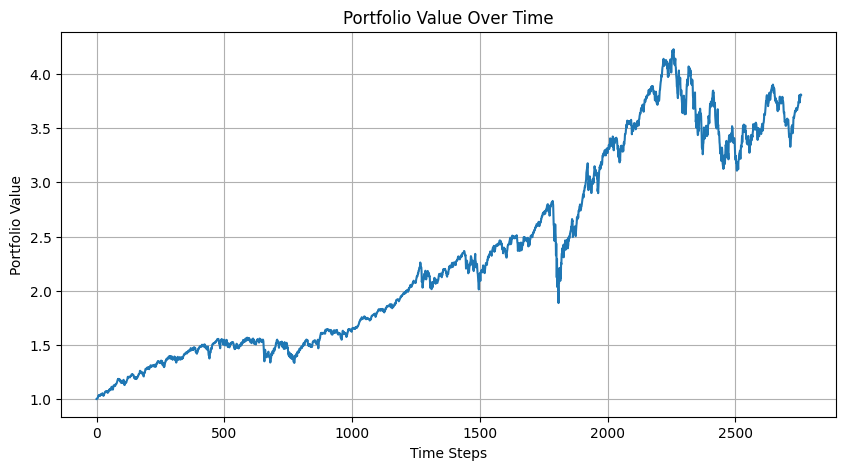

In [93]:
# ==== Evaluate Model ====
initial_portfolio_value = 1.0
portfolio_values = [initial_portfolio_value]

state = env.reset()
done = False
weights = np.ones(env.n_assets) / env.n_assets  # Equal weights to start

while not done:
    state_tensor = torch.FloatTensor(state).unsqueeze(0)  # shape: [1, window, n_assets]
    with torch.no_grad():
        new_weights = model(state_tensor).squeeze(0).numpy()

    new_weights = np.clip(new_weights, 0, 1)
    new_weights = new_weights / np.sum(new_weights)

    # Compute return same way as inside env.step()
    current_prices = env.prices[env.current_step + env.window - 1]
    next_prices = env.prices[env.current_step + env.window]
    log_returns = np.log(next_prices / current_prices + 1e-8)
    gross_return = np.dot(new_weights, log_returns)
    transaction_cost = env.transaction_fee * np.sum(np.abs(new_weights - weights))
    net_return = gross_return - transaction_cost

    # Update portfolio value
    new_value = portfolio_values[-1] * (1 + net_return)
    portfolio_values.append(new_value)

    weights = new_weights
    state, _, done, _ = env.step(new_weights)

# ==== Plot Portfolio Growth ====
plt.figure(figsize=(10, 5))
plt.plot(portfolio_values)
plt.title("Portfolio Value Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.show()


In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import torch

# ==========================
# Helper: Mean-Variance Portfolio
# ==========================
def mean_variance_weights(past_window_prices):
    log_returns = np.log(past_window_prices[1:] / past_window_prices[:-1] + 1e-8)
    
    mu = np.mean(log_returns, axis=0)
    Sigma = np.cov(log_returns.T)
    
    # Regularize the covariance matrix to prevent ill-conditioning
    Sigma += 1e-4 * np.eye(Sigma.shape[0])

    w = cp.Variable(env.n_assets)
    gamma = 1.0  # risk aversion

    objective = cp.Maximize(mu @ w - gamma * cp.quad_form(w, Sigma))
    
    # Allow short-selling with reasonable bounds
    constraints = [cp.sum(w) == 1, w >= -0.5, w <= 1.5]

    prob = cp.Problem(objective, constraints)
    prob.solve()

    return w.value if w.value is not None else np.ones(env.n_assets) / env.n_assets

# ==========================
# Evaluate All Models
# ==========================
def evaluate_strategy(get_weights_func, label):
    portfolio_values = [1.0]
    state = env.reset()
    weights = np.ones(env.n_assets) / env.n_assets

    while env.current_step + env.window < len(env.prices) - 1:
        new_weights = get_weights_func(env)

        current_prices = env.prices[env.current_step + env.window - 1]
        next_prices = env.prices[env.current_step + env.window]
        log_returns = np.log(next_prices / current_prices + 1e-8)

        gross_return = np.dot(new_weights, log_returns)
        transaction_cost = env.transaction_fee * np.sum(np.abs(new_weights - weights))
        net_return = gross_return - transaction_cost

        new_value = portfolio_values[-1] * (1 + net_return)
        portfolio_values.append(new_value)

        weights = new_weights
        env.step(new_weights)

    return portfolio_values

# ======== 1. RL Model (updated) ==========
def rl_weights(env):
    state_tensor = torch.FloatTensor(env._get_observation()).unsqueeze(0)
    with torch.no_grad():
        w = model(state_tensor).squeeze(0).numpy()

    # Zero-mean and L1 normalization for short selling
    w = w - np.mean(w)
    w = w / (np.sum(np.abs(w)) + 1e-8)
    return w

# ======== 2. Equal Weight ==========
def equal_weight(env):
    return np.ones(env.n_assets) / env.n_assets

# ======== 3. Mean-Variance ==========
def mv_weights(env):
    past_window = env.prices[env.current_step:env.current_step + env.window + 1]
    return mean_variance_weights(past_window)

# ========== Run Evaluations ==========
rl_vals = evaluate_strategy(rl_weights, "RL Agent (Short Allowed)")
equal_vals = evaluate_strategy(equal_weight, "Equal Weight (1/N)")
mv_vals = evaluate_strategy(mv_weights, "Mean-Variance")

# ========== Plot ==========
plt.figure(figsize=(12, 6))
plt.plot(rl_vals, label="RL Agent (Short Allowed)")
plt.plot(equal_vals, label="Equal Weight (1/N)")
#plt.plot(mv_vals, label="Mean-Variance Portfolio")
plt.title("Portfolio Value Over Time")
plt.xlabel("Time Step")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [98]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from datetime import datetime
from sklearn.preprocessing import StandardScaler


In [99]:
import yfinance as yf
import numpy as np
import pandas as pd

def download_data(tickers, start, end):
    data = yf.download(tickers, start=start, end=end)['Close']
    return data.dropna()

def compute_normalized_returns(price_df):
    # Compute daily returns
    returns_df = price_df.pct_change().dropna()

    # Normalize using z-score
    mean = returns_df.mean()
    std = returns_df.std()
    normalized_returns = (returns_df - mean) / std

    return normalized_returns

# Parameters
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
start_date = "2015-01-01"
end_date = "2022-12-31"

# Download prices and compute normalized returns
price_df = download_data(tickers, start_date, end_date)
returns_df = compute_normalized_returns(price_df)


[*********************100%***********************]  4 of 4 completed


## Actor-critic model 

In [18]:
import yfinance as yf
import pandas as pd

tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'BRK-B', 'JPM', 'JNJ',
    'V', 'UNH', 'HD', 'PG', 'MA', 'DIS', 'BAC', 'XOM', 'VZ', 'ADBE',
    'PFE', 'KO', 'PEP', 'T', 'MRK', 'ABBV', 'CVX', 'INTC', 'CSCO', 'WMT',
    'NFLX', 'NKE', 'CRM', 'ORCL', 'ACN', 'ABT', 'TMO', 'MCD', 'UPS', 'COST',
    'QCOM', 'LLY', 'MDT', 'DHR', 'AMGN', 'TXN', 'HON', 'NEE', 'PM', 'BMY'
]

# Download historical data
data = yf.download(tickers, start="2011-01-01", end="2024-01-01", group_by='ticker')

# Extract Close prices
close_prices = pd.DataFrame({ticker: data[ticker]['Close'] for ticker in tickers})

# Optionally, display the head



[*********************100%***********************]  50 of 50 completed


In [19]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [20]:
def calculate_indicators(price_df):
    close = price_df
    ma = close.rolling(window=28).mean()
    
    delta = close.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / (avg_loss + 1e-9)
    rsi = 100 - (100 / (1 + rs))
    
    ema_fast = close.ewm(span=12, adjust=False).mean()
    ema_slow = close.ewm(span=26, adjust=False).mean()
    macd = ema_fast - ema_slow
    signal = macd.ewm(span=9, adjust=False).mean()
    macd_hist = macd - signal

    return close, ma, rsi.fillna(0), macd_hist.fillna(0)


In [21]:
def prepare_state(price_df):
    close, ma, rsi, macd = calculate_indicators(price_df)

    vt = price_df.pct_change().fillna(0)  # Vt
    stacked = np.stack([
        vt.values,
        close.values,
        ma.values,
        rsi.values,
        macd.values
    ], axis=-1)  # Shape: (timesteps, num_assets, 5)

    cov_matrix = np.cov(vt.dropna().T)  # shape: (num_assets, num_assets)

    # Element-wise multiplication across time
    input_tensor = []
    for t in range(stacked.shape[0]):
        if np.isnan(stacked[t]).any():
            continue
        vec = stacked[t]  # shape: (num_assets, 5)
        cov_weighted = np.dot(cov_matrix, vec)  # shape: (num_assets, 5)
        input_tensor.append(cov_weighted)

    return torch.tensor(np.array(input_tensor), dtype=torch.float32).to(device)


In [22]:
class ActorCNN(nn.Module):
    def __init__(self, num_assets):
        super(ActorCNN, self).__init__()
        self.conv1 = nn.Conv1d(5, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * num_assets, 128)
        self.fc2 = nn.Linear(128, num_assets)

    def forward(self, x):
        # x: (batch_size, num_assets, 5)
        x = x.permute(0, 2, 1)  # -> (batch_size, 5, num_assets)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # flatten
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=-1)  # portfolio weights
        return x


In [23]:
class CriticCNN(nn.Module):
    def __init__(self, num_assets):
        super(CriticCNN, self).__init__()
        self.conv1 = nn.Conv1d(5, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * num_assets + num_assets, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x, action):
        # x: (batch_size, num_assets, 5)
        x = x.permute(0, 2, 1)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = torch.cat([x, action], dim=1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)


In [24]:
import gym
from gym import spaces

class PortfolioEnv(gym.Env):
    def __init__(self, data, window_size=50, initial_cash=1e6):
        super(PortfolioEnv, self).__init__()
        self.data = data
        self.num_assets = data.shape[1]
        self.window_size = window_size
        self.initial_cash = initial_cash
        self.current_step = 0
        self.done = False

        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.num_assets, 5), dtype=np.float32)
        self.action_space = spaces.Box(low=0, high=1, shape=(self.num_assets,), dtype=np.float32)

        self._prepare_state()

    def _prepare_state(self):
        self.close, self.ma, self.rsi, self.macd = calculate_indicators(self.data)
        self.vt = self.data.pct_change().fillna(0)
        self.cov = np.cov(self.vt.dropna().T)

        self.states = []
        for t in range(self.window_size, len(self.data)):
            vec = np.stack([
                self.vt.iloc[t].values,
                self.close.iloc[t].values,
                self.ma.iloc[t].values,
                self.rsi.iloc[t].values,
                self.macd.iloc[t].values
            ], axis=-1)  # shape: (num_assets, 5)
            cov_weighted = np.dot(self.cov, vec)  # shape: (num_assets, 5)
            if np.isnan(cov_weighted).any(): 
                continue
            self.states.append(cov_weighted)

    def reset(self):
        self.current_step = 0
        self.done = False
        self.portfolio_value = self.initial_cash
        self.weights = np.ones(self.num_assets) / self.num_assets  # start with equal allocation
        return self.states[self.current_step]

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / (np.sum(action) + 1e-8)  # normalize weights

        prev_price = self.data.iloc[self.current_step + self.window_size - 1].values
        next_price = self.data.iloc[self.current_step + self.window_size].values
        returns = (next_price - prev_price) / (prev_price+0.0001)
        returns = np.nan_to_num(returns, nan=0.0, posinf=0.0, neginf=0.0)
        portfolio_return = np.dot(action, returns)

        self.portfolio_value *= (1 + portfolio_return)
        reward = portfolio_return
        self.current_step += 1

        if self.current_step >= len(self.states) - 1:
            self.done = True

        next_state = self.states[self.current_step]
        return next_state, reward, self.done, {}

    def render(self, mode='human'):
        print(f"Step: {self.current_step}, Portfolio Value: {self.portfolio_value}")


In [25]:
class DDPGAgent:
    def __init__(self, num_assets):
        self.actor = ActorCNN(num_assets).to(device)
        self.actor_target = ActorCNN(num_assets).to(device)
        self.critic = CriticCNN(num_assets).to(device)
        self.critic_target = CriticCNN(num_assets).to(device)

        self.actor_target.load_state_dict(self.actor.state_dict())
        self.critic_target.load_state_dict(self.critic.state_dict())

        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=1e-4)
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=1e-3)

        self.criterion = nn.MSELoss()
        self.gamma = 0.99
        self.tau = 0.005

    def update(self, state, action, reward, next_state):
        with torch.no_grad():
            target_action = self.actor_target(next_state)
            target_q = self.critic_target(next_state, target_action)
            y = reward + self.gamma * target_q

        q = self.critic(state, action)
        critic_loss = self.criterion(q, y)

        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()

        actor_loss = -self.critic(state, self.actor(state)).mean()

        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # Soft update
        for param, target_param in zip(self.actor.parameters(), self.actor_target.parameters()):
            target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
        for param, target_param in zip(self.critic.parameters(), self.critic_target.parameters()):
            target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
